In [20]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from prettytable import PrettyTable
import random
from sklearn.metrics import roc_curve, auc
from sklearn.learning_curve import validation_curve
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import precision_score, recall_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import roc_auc_score
import scikitplot as skplt

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

#import nltk
#nltk.download('stopwords')

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

#from gensim.models import KeyedVectors
#model = KeyedVectors.load_word2vec_format(‘GoogleNews-vectors-negative300.bin.gz’,binary=True)

#import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

# =============================================================================================

In [19]:
# using the SQLite Table to read data.
con = sqlite3.connect('database.sqlite') 


#filtering only positive and negative reviews i.e. 
# not taking into consideration those reviews with Score=3
#filtered_data2 = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Id <= 10000""", con)
#taking into consideration only 10K entries because of memory contrain
filtered_data  = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3  """, con) 
print(filtered_data.shape)

# Give reviews with Score>3 a positive rating, and reviews with a score<3 a negative rating.
def partition(x):
    if x < 3:
        return 0
    return 1

#changing reviews with score less than 3 to be positive and vice-versa
actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative
print(filtered_data.shape)

(525814, 10)
(525814, 10)


In [94]:
#Sorting 60K data according to TimeStamp in ascending order
sorted_data=filtered_data.sort_values('Time', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
sorted_data.count()
print(type(sorted_data))

#Deduplication of entries
final2=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final = final2.head(60000) #selecting first 60K rows of data based on TimeStamp
final.shape
#final2.shape
#print(type(final))
#print(type(final2))
#final.head
#Observation: Removing deuplicate entries with ID<=10K

<class 'pandas.core.frame.DataFrame'>


(60000, 10)

In [95]:
import pickle
sorted_data2 = sorted_data.to_pickle("./sorted_data_to_file.pkl") #saving a DataFrame on disk

In [96]:
display= pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE HelpfulnessNumerator > HelpfulnessDenominator 
ORDER BY ProductID
""", con)

display.head()
final.shape
##Observation: No such entry is found where denominator is less than numerator 

(60000, 10)

In [97]:
# find sentences containing HTML tags
import re
i=0;
for sent in final['Text'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

8
What happens when you say his name three times? Michael Keaten stars in this comedy about two couples that live in an old two story house.  While coming back from a supply store, the couple suddenly get caught inside of a  &quot;broken-up&quot; bridge and then just before they start to tumble down  into the lake, a board catches them.  But just when they've got their hopes  up, and small dog steps on the board and the car starts to slide off the  bridge and into the lake waters.  A few minutes later...<p>They find  themselves back into their home, they find that somehow somehad light the  fireplace, as if done by magic.  From then on, they find a weird-looking  dead guy known as Bettlejuice.  The only way they can get him for help is  to call him by his name three times and he will appear at their survice.  But they soon wish that they have never called his name, because  Bettlejuice was once a troublemaker but he is the only one who can save  them, on the account that they said his 

In [98]:
stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{'o', "haven't", 'now', 'what', 'when', "should've", 'before', 'shan', "aren't", 'below', 'under', 'off', 'which', 'through', 'other', 'been', 'between', "mightn't", 'shouldn', 'mightn', 'who', 'am', "you'll", 'over', 'until', 'there', 'all', 'they', "needn't", 'do', "you're", 'in', 'we', 'm', 'them', 'yourselves', 'for', 'into', "she's", 'has', "shouldn't", 'himself', 'it', 'some', 'as', 'further', 'an', "won't", 'of', "mustn't", 'myself', 'did', 'doesn', 'to', 'not', 'nor', 'this', "that'll", 'during', 'doing', "don't", 'can', 'i', 'down', 'yours', 'she', 'very', 'didn', "it's", 'these', 'more', 'have', 'is', 'his', 'only', 'me', 'won', 'up', 'mustn', 'each', 'few', 'whom', 'those', "couldn't", 'while', 'or', "shan't", "hadn't", 'how', 'such', 'him', 'any', 'ma', 'ain', "didn't", 'because', "wouldn't", 'theirs', 'but', 'you', 'are', 'my', 'a', 'and', 'once', 'don', 'no', 'had', 'on', 'after', 'hasn', 'should', 'its', 's', "isn't", 'too', 'that', "hasn't", 'd', 'wasn', 'y', 'ours', 'n

In [99]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase
# this code takes a while to run as it needs to run on 60K sentences.
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [100]:
final['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 
final['CleanedText']=final['CleanedText'].str.decode("utf-8")
print(final.shape)

(60000, 11)


In [101]:
final.head(3) #below the processed review can be seen in the CleanedText Column 

# store final table into an SQlLite table for future.
conn = sqlite3.connect('final.sqlite')
c=conn.cursor()
conn.text_factory = str
final.to_sql('Reviews', conn,  schema=None, if_exists='replace', index=True, index_label=None, chunksize=None, dtype=None)

import pickle
final2 = final.to_pickle("./final_to_file2.pkl") #saving a DataFrame on disk

final.shape
#print(final2.shape)

(60000, 11)

In [102]:
# create design matrix X and target vector y
X = np.array(final.iloc[:,:]) # end index is exclusive
y = np.array(final['Score']) # showing you two ways of indexing a pandas df

In [103]:
X_train = X[0:38400:1]
X_cv = X[38400:48000:1]
X_test = X[48000:60000:1]

y_train = y[0:38400:1]
y_cv = y[38400:48000:1]
y_test =y[48000:60000:1]

print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)
print(y_train.shape)
print(y_cv.shape)
print(y_test.shape)

(38400, 11)
(9600, 11)
(12000, 11)
(38400,)
(9600,)
(12000,)


In [104]:
#Writing splitted data with cross-validation data
# open the file for writing an array to fileto be save on disk from X_train data
fileObject = open("./train_to_file.pkl",'wb')
pickle.dump(X_train,fileObject)   # this writes the object a to the file
fileObject.close() # here we close the fileObject

# open the file for writing an array to fileto be save on disk from X_test data
fileObject = open("./x_cv_to_file.pkl",'wb')
pickle.dump(X_cv,fileObject)   # this writes the object a to the file
fileObject.close() # here we close the fileObject

# open the file for writing an array to fileto be save on disk from X_test data
fileObject = open("./x_test_to_file.pkl",'wb')
pickle.dump(X_test,fileObject)   # this writes the object a to the file
fileObject.close() # here we close the fileObject

# open the file for writing an array to fileto be save on disk from y_train data
fileObject = open("./y_train_to_file.pkl",'wb')
pickle.dump(y_train,fileObject)   # this writes the object a to the file
fileObject.close() # here we close the fileObject

# open the file for writing an array to fileto be save on disk from y_test data
fileObject = open("./y_cv_to_file.pkl",'wb')
pickle.dump(y_cv,fileObject)   # this writes the object a to the file
fileObject.close() # here we close the fileObject

# open the file for writing an array to fileto be save on disk from y_test data
fileObject = open("./y_test_to_file.pkl",'wb')
pickle.dump(y_test,fileObject)   # this writes the object a to the file
fileObject.close() # here we close the fileObject

In [3]:
fileObject = open("./train_to_file.pkl",'rb') # we open the file for reading 
X_train = pickle.load(fileObject) # load the object from the file

fileObject = open("./x_cv_to_file.pkl",'rb') # we open the file for reading 
X_cv = pickle.load(fileObject) # load the object from the file

fileObject = open("./x_test_to_file.pkl",'rb') # we open the file for reading 
X_test = pickle.load(fileObject) # load the object from the file

fileObject = open("./y_train_to_file.pkl",'rb') # we open the file for reading 
y_train = pickle.load(fileObject) # load the object from the file

fileObject = open("./y_cv_to_file.pkl",'rb') # we open the file for reading 
y_cv = pickle.load(fileObject) # load the object from the file

fileObject = open("./y_test_to_file.pkl",'rb') # we open the file for reading 
y_test = pickle.load(fileObject) # load the object from the file

In [4]:
#Appling BoW to fit and transform
count_vect =  CountVectorizer()
bow_NB = count_vect.fit(X_train[:,9])
train_bow_nstd = count_vect.transform(X_train[:,9])
cv_bow_nstd = count_vect.transform(X_cv[:,9]) 
test_bow_nstd = count_vect.transform(X_test[:,9]) 

print("the type of count vectorizer ",type(train_bow_nstd))
print("the number of unique words ", test_bow_nstd.get_shape()[1])

print(train_bow_nstd.shape)
print(cv_bow_nstd.shape)
print(test_bow_nstd.shape)
print(y_train.shape)
print(y_cv.shape)
print(y_test.shape)

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the number of unique words  37996
(38400, 37996)
(9600, 37996)
(12000, 37996)
(38400,)
(9600,)
(12000,)


In [5]:
# Column Standardization of the BoW non-standard vector
std_scal = StandardScaler(with_mean=False)
std_scal.fit(train_bow_nstd)
train_bow = std_scal.transform(train_bow_nstd)
cv_bow = std_scal.transform(cv_bow_nstd)
test_bow = std_scal.transform(test_bow_nstd)

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [36]:
roc_score_train = []
roc_score_cv = []
length = (train_bow.shape)
length[0]
pred = []
length1 = (cv_bow.shape)
length1[0]
cv_scores = []
train_scores = []

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute')

    # fitting the model on crossvalidation train
    knn.fit(train_bow, y_train)
    
    #ROC score of Train Data
    train_prob = []
    for m in range(0,length[0],1000):
        train_prob.extend(knn.predict_proba(train_bow[m:m+1000]))
    
    train_prob2 = np.asarray(train_prob)
    train_prob3 = train_prob2[:,1]
    scores_train = roc_auc_score(y_train,train_prob3)
    roc_score_train.append(scores_train)
    
    cv_prob = []
    for n in range(0,length1[0],1000):
        cv_prob.extend(knn.predict_proba(cv_bow[n:n+1000]))

    cv_prob2 = np.asarray(cv_prob)
    cv_prob3 = cv_prob2[:,1]
    scores_cv = roc_auc_score(y_cv,cv_prob3)
    roc_score_cv.append(scores_cv)      
 
    print("For Hyperparameter value of K = ",i)
    print("AUC Score on Train Data: ",roc_score_train[-1])
    print("AUC Score on CV Data: ",roc_score_cv[-1])
    print("**************")

# open the file for writing an array to fileto be save on disk 
fileObject = open("./train_scores_to_file.pkl",'wb')
pickle.dump(roc_score_train,fileObject)   # this writes the object a to the file
fileObject.close() # here we close the fileObject

# open the file for writing an array to fileto be save on disk 
fileObject = open("./cv_scores_to_file.pkl",'wb')
pickle.dump(roc_score_cv,fileObject)   # this writes the object a to the file
fileObject.close() # here we close the fileObject

For Hyperparameter value of K =  1
AUC Score on Train Data:  1.0
AUC Score on CV Data:  0.5582674924785005
**************
For Hyperparameter value of K =  3
AUC Score on Train Data:  0.9594771027488411
AUC Score on CV Data:  0.6250104003035225
**************
For Hyperparameter value of K =  5
AUC Score on Train Data:  0.9385711616123557
AUC Score on CV Data:  0.6596131461500572
**************
For Hyperparameter value of K =  7
AUC Score on Train Data:  0.9259650548015257
AUC Score on CV Data:  0.678437331515083
**************
For Hyperparameter value of K =  9
AUC Score on Train Data:  0.9158882624788621
AUC Score on CV Data:  0.6928264634475093
**************
For Hyperparameter value of K =  11
AUC Score on Train Data:  0.9072456993055835
AUC Score on CV Data:  0.7009720331678159
**************
For Hyperparameter value of K =  13
AUC Score on Train Data:  0.9021957926517195
AUC Score on CV Data:  0.7043640921616656
**************
For Hyperparameter value of K =  15
AUC Score on Train 

In [6]:
fileObject = open("./train_scores_to_file.pkl",'rb') # we open the file for reading 
train_scores = pickle.load(fileObject) # load the object from the file

fileObject = open("./cv_scores_to_file.pkl",'rb') # we open the file for reading 
cv_scores = pickle.load(fileObject) # load the object from the file

In [7]:
# creating odd list of K for KNN
myList = list(range(0,30))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
neighbors

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

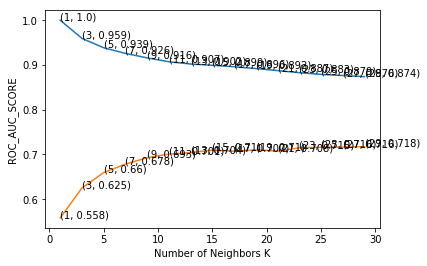

In [8]:
plt.plot(neighbors, train_scores)
plt.plot(neighbors, cv_scores)

for xy in zip(neighbors, np.round(train_scores,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(neighbors, np.round(cv_scores,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('ROC_AUC_SCORE')

plt.show()

In [9]:
#Training KNN for best hyperparameter
knn = KNeighborsClassifier(29,algorithm='brute')
knn.fit(train_bow,y_train)
#pred = knn.predict(test_bow)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='uniform')

In [10]:
length = (test_bow.shape)
length[0]

12000

In [11]:
#finding roc_auc_score on test data
roc_score_test = []
length3 = (test_bow.shape)
pred_test = []
for i in range(0,length3[0],1000):
    pred_test.extend(knn.predict_proba(test_bow[i:i+1000]))

test_prob2 = np.asarray(pred_test)
test_prob3 = test_prob2[:,1]
scores_test = roc_auc_score(y_test,test_prob3)
roc_score_test.append(scores_test)

#second method
fpr, tpr, thresholds = roc_curve(y_test, test_prob3)
roc_auc = auc(fpr, tpr,reorder='deprecated')
#this will work

In [12]:
print(roc_score_test)
print(roc_auc)

[0.7076795890026133]
0.7076795890026133


In [14]:
#defining own threshhold for prediction over probability values
def pred(y):
    y_pred = []
    for i in y:
        if i.all()>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

y_pred = pred(pred_test)

In [15]:
# Confusion Matrix on Test Data
#y_pred = np.argmax(pred_test, axis=1)
cm_bow = confusion_matrix(y_test, y_pred)
cm_bow

array([[  38, 1446],
       [ 791, 9725]], dtype=int64)

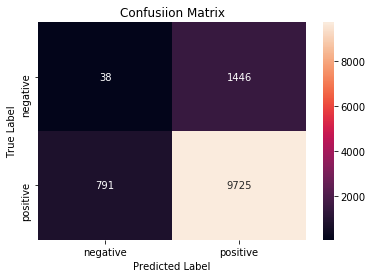

In [16]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_bow, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [17]:
# To show main classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.05      0.03      0.03      1484
          1       0.87      0.92      0.90     10516

avg / total       0.77      0.81      0.79     12000



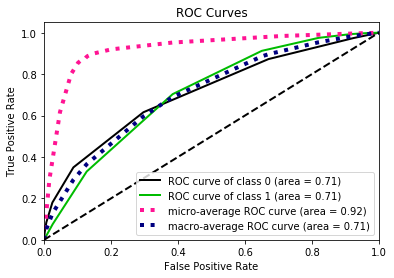

In [21]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test, pred_test)

## BoW - KD Tree

In [22]:
svd = TruncatedSVD()
train_bow_dn = svd.fit_transform(train_bow)
cv_bow_dn = svd.transform(cv_bow)
test_bow_dn = svd.transform(test_bow)
#X_tr_input = X_tr_input1
#x_cv_input = x_cv_input1

In [7]:
roc_score_train_dn = []
roc_score_cv_dn = []
length = (train_bow_dn.shape)
length[0]
length1 = (cv_bow_dn.shape)
length1[0]
cv_scores_dn = []
train_scores_dn = []

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')

    # fitting the model on crossvalidation train
    knn.fit(train_bow_dn, y_train)
    
    #ROC score of Train Data
    train_prob_dn = []
    for m in range(0,length[0],1000):
        train_prob_dn.extend(knn.predict_proba(train_bow_dn[m:m+1000]))
    
    train_prob2 = np.asarray(train_prob_dn)
    train_prob3 = train_prob2[:,1]
    scores_train_dn = roc_auc_score(y_train,train_prob3)
    roc_score_train_dn.append(scores_train_dn)
    
    cv_prob_dn = []
    for n in range(0,length1[0],1000):
        cv_prob_dn.extend(knn.predict_proba(cv_bow_dn[n:n+1000]))

    cv_prob2 = np.asarray(cv_prob_dn)
    cv_prob3 = cv_prob2[:,1]
    scores_cv_dn = roc_auc_score(y_cv,cv_prob3)
    roc_score_cv_dn.append(scores_cv_dn)      
 
    print("For Hyperparameter value of K = ",i)
    print("AUC Score on Train Data: ",roc_score_train_dn[-1])
    print("AUC Score on CV Data: ",roc_score_cv_dn[-1])
    print("**************")

# open the file for writing an array to file to save on disk 
fileObject = open("./train_scores_dn_to_file.pkl",'wb')
pickle.dump(roc_score_train_dn,fileObject)   # this writes the object a to the file
fileObject.close() # here we close the fileObject

# open the file for writing an array to file to save on disk 
fileObject = open("./cv_scores_dn_to_file.pkl",'wb')
pickle.dump(roc_score_cv_dn,fileObject)   # this writes the object a to the file
fileObject.close() # here we close the fileObject

For Hyperparameter value of K =  1
AUC Score on Train Data:  1.0
AUC Score on CV Data:  0.49551638001514775
**************
For Hyperparameter value of K =  3
AUC Score on Train Data:  0.9115102651720306
AUC Score on CV Data:  0.5034575829460358
**************
For Hyperparameter value of K =  5
AUC Score on Train Data:  0.8561730942476127
AUC Score on CV Data:  0.5111056991439002
**************
For Hyperparameter value of K =  7
AUC Score on Train Data:  0.8179734292459959
AUC Score on CV Data:  0.508019909352201
**************
For Hyperparameter value of K =  9
AUC Score on Train Data:  0.785730831307097
AUC Score on CV Data:  0.5169106738670505
**************
For Hyperparameter value of K =  11
AUC Score on Train Data:  0.7633018049376674
AUC Score on CV Data:  0.5166531788314696
**************
For Hyperparameter value of K =  13
AUC Score on Train Data:  0.7450899554035945
AUC Score on CV Data:  0.5203270617580286
**************
For Hyperparameter value of K =  15
AUC Score on Train 

In [23]:
fileObject = open("./train_scores_dn_to_file.pkl",'rb') # we open the file for reading 
train_scores_dn = pickle.load(fileObject) # load the object from the file

fileObject = open("./cv_scores_dn_to_file.pkl",'rb') # we open the file for reading 
cv_scores_dn = pickle.load(fileObject) # load the object from the file

In [27]:
# creating odd list of K for KNN
myList = list(range(0,30))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
neighbors

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

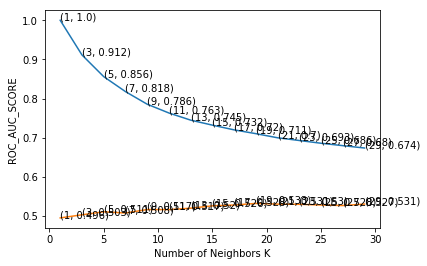

In [28]:
plt.plot(neighbors, train_scores_dn)
plt.plot(neighbors, cv_scores_dn)

for xy in zip(neighbors, np.round(train_scores_dn,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(neighbors, np.round(cv_scores_dn,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('ROC_AUC_SCORE')

plt.show()

In [29]:
#Training KNN for best hyperparameter
knn = KNeighborsClassifier(19,algorithm='kd_tree')
knn.fit(train_bow_dn,y_train)
#pred = knn.predict(test_bow)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform')

In [ ]:
#finding roc_auc_score on test data
roc_score_test = []
length3 = (test_bow.shape)
pred_test = []
for i in range(0,length3[0],1000):
    pred_test.extend(knn.predict_proba(test_bow[i:i+1000]))

test_prob2 = np.asarray(pred_test)
test_prob3 = test_prob2[:,1]
scores_test = roc_auc_score(y_test,test_prob3)
roc_score_test.append(scores_test)

#second method
fpr, tpr, thresholds = roc_curve(y_test, test_prob3)
roc_auc = auc(fpr, tpr,reorder='deprecated')
#this will work

In [30]:
#finding roc_auc_score on test data
roc_score_test_dn = []
length3 = (test_bow_dn.shape)
pred_test_dn = []
for i in range(0,length3[0],1000):
    pred_test_dn.extend(knn.predict_proba(test_bow_dn[i:i+1000]))

test_prob2 = np.asarray(pred_test_dn)
test_prob3 = test_prob2[:,1]
scores_test_dn = roc_auc_score(y_test,test_prob3)
roc_score_test_dn.append(scores_test_dn)

#second method
fpr, tpr, thresholds = roc_curve(y_test, test_prob3)
roc_auc_dn = auc(fpr, tpr,reorder='deprecated')

In [32]:
print(roc_score_test_dn)
print(roc_auc_dn)

[0.5208303750208897]
0.5208303750208897


In [39]:
#defining own threshhold for prediction over probability values
def pred(y):
    y_pred = []
    for i in y:
        if i.all()>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

y_pred_dn = pred(pred_test_dn)

In [40]:
# Confusion Matrix on Test Data
#y_pred_dn = np.argmax(pred_test_dn, axis=1)
cm_bow_dn = confusion_matrix(y_test, y_pred_dn)
cm_bow_dn

array([[ 177, 1307],
       [1323, 9193]], dtype=int64)

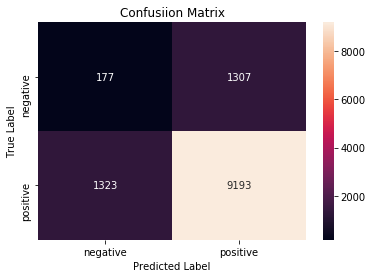

In [41]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_bow_dn, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [42]:
# To show main classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dn))

             precision    recall  f1-score   support

          0       0.12      0.12      0.12      1484
          1       0.88      0.87      0.87     10516

avg / total       0.78      0.78      0.78     12000



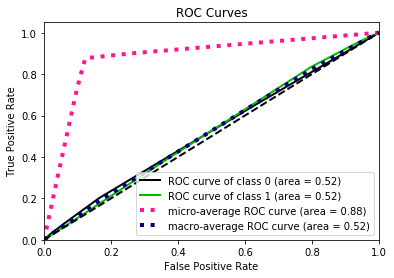

In [44]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test, pred_test_dn)

## TF-IDF

In [45]:
#tf-idf on train data
tf_idf_vect = TfidfVectorizer(ngram_range=(1,1)) #considering only uni-gram as I was getting memory error
train_tf_idf_nstd = tf_idf_vect.fit_transform(X_train[:,9]) #sparse matrix
cv_tfidf_nstd = tf_idf_vect.transform(X_cv[:,9])
test_tfidf_nstd = tf_idf_vect.transform(X_test[:,9])
print(train_tf_idf_nstd.shape)
print(cv_tfidf_nstd.shape)
print(test_tfidf_nstd.shape)

(38400, 37996)
(9600, 37996)
(12000, 37996)


In [46]:
# Column Standardization of the tfidf non-standard vector
std_scal = StandardScaler(with_mean=False)
std_scal.fit(train_tf_idf_nstd)
train_tfidf = std_scal.transform(train_tf_idf_nstd)
cv_tfidf = std_scal.transform(cv_tfidf_nstd)
test_tfidf = std_scal.transform(test_tfidf_nstd)

In [22]:
roc_score_train_tfidf = []
roc_score_cv_tfidf = []
length = (train_tfidf.shape)
length[0]
length1 = (cv_tfidf.shape)
length1[0]
cv_scores_tfidf = []
train_scores_tfidf = []

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn_tfidf = KNeighborsClassifier(n_neighbors=i,algorithm='brute')

    # fitting the model on crossvalidation train
    knn_tfidf.fit(train_tfidf, y_train)
    
    #ROC score of Train Data
    train_prob_tfidf = []
    for m in range(0,length[0],1000):
        train_prob_tfidf.extend(knn_tfidf.predict_proba(train_tfidf[m:m+1000]))
    
    train_prob2 = np.asarray(train_prob_tfidf)
    train_prob3 = train_prob2[:,1]
    scores_train_tfidf = roc_auc_score(y_train,train_prob3)
    roc_score_train_tfidf.append(scores_train_tfidf)
    
    cv_prob_tfidf = []
    for n in range(0,length1[0],1000):
        cv_prob_tfidf.extend(knn_tfidf.predict_proba(cv_tfidf[n:n+1000]))

    cv_prob2 = np.asarray(cv_prob_tfidf)
    cv_prob3 = cv_prob2[:,1]
    scores_cv_tfidf = roc_auc_score(y_cv,cv_prob3)
    roc_score_cv_tfidf.append(scores_cv_tfidf)      
 
    print("For Hyperparameter value of K = ",i)
    print("AUC Score on Train Data: ",roc_score_train_tfidf[-1])
    print("AUC Score on CV Data: ",roc_score_cv_tfidf[-1])
    print("**************")

# open the file for writing an array to fileto be save on disk 
fileObject = open("./train_scores_tfidf_to_file.pkl",'wb')
pickle.dump(roc_score_train_tfidf,fileObject)   # this writes the object a to the file
fileObject.close() # here we close the fileObject

# open the file for writing an array to fileto be save on disk 
fileObject = open("./cv_scores_tfidf_to_file.pkl",'wb')
pickle.dump(roc_score_cv_tfidf,fileObject)   # this writes the object a to the file
fileObject.close() # here we close the fileObject

For Hyperparameter value of K =  1
AUC Score on Train Data:  1.0
AUC Score on CV Data:  0.555184563704417
**************
For Hyperparameter value of K =  3
AUC Score on Train Data:  0.9670363421050668
AUC Score on CV Data:  0.5821555992225445
**************
For Hyperparameter value of K =  5
AUC Score on Train Data:  0.953002289133024
AUC Score on CV Data:  0.5846116857607994
**************
For Hyperparameter value of K =  7
AUC Score on Train Data:  0.9438715462188633
AUC Score on CV Data:  0.5865619136254876
**************
For Hyperparameter value of K =  9
AUC Score on Train Data:  0.9351810021616954
AUC Score on CV Data:  0.5943882996082112
**************
For Hyperparameter value of K =  11
AUC Score on Train Data:  0.9269156050815093
AUC Score on CV Data:  0.6075837398448224
**************
For Hyperparameter value of K =  13
AUC Score on Train Data:  0.9189572853336189
AUC Score on CV Data:  0.6263439367883152
**************
For Hyperparameter value of K =  15
AUC Score on Train D

In [47]:
fileObject = open("./train_scores_tfidf_to_file.pkl",'rb') # we open the file for reading 
train_scores_tfidf = pickle.load(fileObject) # load the object from the file

fileObject = open("./cv_scores_tfidf_to_file.pkl",'rb') # we open the file for reading 
cv_scores_tfidf = pickle.load(fileObject) # load the object from the file

In [48]:
# creating odd list of K for KNN
myList = list(range(0,30))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
neighbors

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

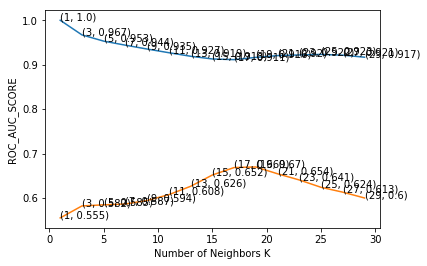

In [49]:
plt.plot(neighbors, train_scores_tfidf)
plt.plot(neighbors, cv_scores_tfidf)

for xy in zip(neighbors, np.round(train_scores_tfidf,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(neighbors, np.round(cv_scores_tfidf,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('ROC_AUC_SCORE')

plt.show()

In [50]:
#Training KNN for best hyperparameter, K=19
knn_tfidf = KNeighborsClassifier(19,algorithm='brute')
knn_tfidf.fit(train_tfidf,y_train)
#pred = knn.predict(test_bow)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform')

In [51]:
#finding roc_auc_score on test data
roc_score_test_tfidf = []
length3 = (test_tfidf.shape)
pred_test_tfidf = []
for i in range(0,length3[0],1000):
    pred_test_tfidf.extend(knn_tfidf.predict_proba(test_tfidf[i:i+1000]))

test_prob2 = np.asarray(pred_test_tfidf)
test_prob3 = test_prob2[:,1]
scores_test_tfidf = roc_auc_score(y_test,test_prob3)
roc_score_test_tfidf.append(scores_test_tfidf)

#second method
fpr, tpr, thresholds = roc_curve(y_test, test_prob3)
roc_auc_tfidf = auc(fpr, tpr,reorder='deprecated')

In [52]:
print(roc_score_test_tfidf)
print(roc_auc_tfidf)

[0.6179884791138444]
0.6179884791138444


In [117]:
#defining own threshhold for prediction over probability values
def pred(y):
    y_pred = []
    for i in y:
        if i.all()>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

y_pred_tfidf = pred(pred_test_tfidf)

In [118]:
# Confusion Matrix on Test Data
#y_pred_tfidf = np.argmax(pred_test_tfidf, axis=1)
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
cm_tfidf

array([[ 637,  847],
       [6652, 3864]], dtype=int64)

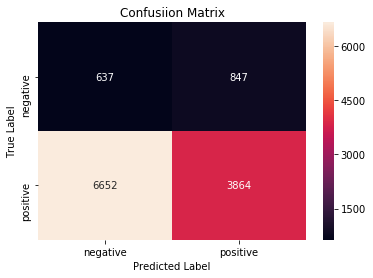

In [119]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_tfidf, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [120]:
# To show main classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tfidf))

             precision    recall  f1-score   support

          0       0.09      0.43      0.15      1484
          1       0.82      0.37      0.51     10516

avg / total       0.73      0.38      0.46     12000



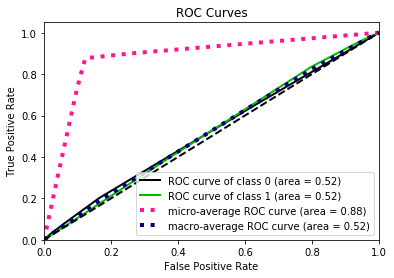

In [121]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test, pred_test_dn)

## TF-IDF - KD-Tree

In [62]:
svd = TruncatedSVD()
train_tfidf_dn = svd.fit_transform(train_tfidf)
cv_tfidf_dn = svd.transform(cv_tfidf)
test_tfidf_dn = svd.transform(test_tfidf)
#X_tr_input = X_tr_input1
#x_cv_input = x_cv_input1

In [34]:
roc_score_train_tfidf_dn = []
roc_score_cv_tfidf_dn = []
length = (train_tfidf_dn.shape)

length[0]
length1 = (cv_tfidf_dn.shape)
length1[0]
cv_scores_tfidf_dn = []
train_scores_tfidf_dn = []

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn_tfidf_dn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')

    # fitting the model on crossvalidation train
    knn_tfidf_dn.fit(train_tfidf_dn, y_train)
    
    #ROC score of Train Data
    train_prob_tfidf_dn = []
    for m in range(0,length[0],1000):
        train_prob_tfidf_dn.extend(knn_tfidf_dn.predict_proba(train_tfidf_dn[m:m+1000]))
    
    train_prob2 = np.asarray(train_prob_tfidf_dn)
    train_prob3 = train_prob2[:,1]
    scores_train_tfidf_dn = roc_auc_score(y_train,train_prob3)
    roc_score_train_tfidf_dn.append(scores_train_tfidf_dn)
    
    cv_prob_tfidf_dn = []
    for n in range(0,length1[0],1000):
        cv_prob_tfidf_dn.extend(knn_tfidf_dn.predict_proba(cv_tfidf_dn[n:n+1000]))

    cv_prob2 = np.asarray(cv_prob_tfidf_dn)
    cv_prob3 = cv_prob2[:,1]
    scores_cv_tfidf_dn = roc_auc_score(y_cv,cv_prob3)
    roc_score_cv_tfidf_dn.append(scores_cv_tfidf_dn)      
 
    print("For Hyperparameter value of K = ",i)
    print("AUC Score on Train Data: ",roc_score_train_tfidf_dn[-1])
    print("AUC Score on CV Data: ",roc_score_cv_tfidf_dn[-1])
    print("**************")

# open the file for writing an array to fileto be save on disk 
fileObject = open("./train_scores_tfidf_dn_to_file.pkl",'wb')
pickle.dump(roc_score_train_tfidf_dn,fileObject)   # this writes the object a to the file
fileObject.close() # here we close the fileObject

# open the file for writing an array to fileto be save on disk 
fileObject = open("./cv_scores_tfidf_dn_to_file.pkl",'wb')
pickle.dump(roc_score_cv_tfidf_dn,fileObject)   # this writes the object a to the file
fileObject.close() # here we close the fileObject

For Hyperparameter value of K =  1
AUC Score on Train Data:  1.0
AUC Score on CV Data:  0.4933721099515735
**************
For Hyperparameter value of K =  3
AUC Score on Train Data:  0.9087892540219125
AUC Score on CV Data:  0.4890540484310651
**************
For Hyperparameter value of K =  5
AUC Score on Train Data:  0.8517275565657175
AUC Score on CV Data:  0.49804531020239645
**************
For Hyperparameter value of K =  7
AUC Score on Train Data:  0.8116651460008636
AUC Score on CV Data:  0.5002006832153186
**************
For Hyperparameter value of K =  9
AUC Score on Train Data:  0.7793618457041643
AUC Score on CV Data:  0.5042022587964673
**************
For Hyperparameter value of K =  11
AUC Score on Train Data:  0.7576119265389624
AUC Score on CV Data:  0.5046958730959868
**************
For Hyperparameter value of K =  13
AUC Score on Train Data:  0.7412397211013054
AUC Score on CV Data:  0.4998390591173944
**************
For Hyperparameter value of K =  15
AUC Score on Trai

In [63]:
fileObject = open("./train_scores_tfidf_dn_to_file.pkl",'rb') # we open the file for reading 
train_scores_tfidf_dn = pickle.load(fileObject) # load the object from the file

fileObject = open("./cv_scores_tfidf_dn_to_file.pkl",'rb') # we open the file for reading 
cv_scores_tfidf_dn = pickle.load(fileObject) # load the object from the file

In [64]:
# creating odd list of K for KNN
myList = list(range(0,30))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
neighbors

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

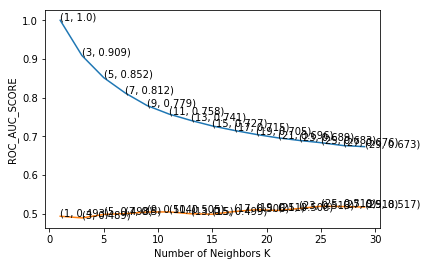

In [65]:
plt.plot(neighbors, train_scores_tfidf_dn)
plt.plot(neighbors, cv_scores_tfidf_dn)

for xy in zip(neighbors, np.round(train_scores_tfidf_dn,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(neighbors, np.round(cv_scores_tfidf_dn,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('ROC_AUC_SCORE')

plt.show()

In [66]:
#Training KNN for best hyperparameter K=25
knn_tfidf_dn = KNeighborsClassifier(25,algorithm='kd_tree')
knn_tfidf_dn.fit(train_tfidf_dn,y_train)
#pred = knn.predict(test_bow)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=2,
           weights='uniform')

In [67]:
#finding roc_auc_score on test data
roc_score_test_tfidf_dn = []
length3 = (test_tfidf_dn.shape)
pred_test_tfidf_dn = []
for i in range(0,length3[0],1000):
    pred_test_tfidf_dn.extend(knn_tfidf_dn.predict_proba(test_tfidf_dn[i:i+1000]))

test_prob2 = np.asarray(pred_test_tfidf_dn)
test_prob3 = test_prob2[:,1]
scores_test_tfidf_dn = roc_auc_score(y_test,test_prob3)
roc_score_test_tfidf_dn.append(scores_test_tfidf_dn)

#second method
fpr, tpr, thresholds = roc_curve(y_test, test_prob3)
roc_auc_tfidf_dn = auc(fpr, tpr,reorder='deprecated')

In [68]:
print(roc_score_test_tfidf_dn)
print(roc_auc_tfidf_dn)

[0.5197627232639468]
0.5197627232639468


In [112]:
#defining own threshhold for prediction over probability values
def pred(y):
    y_pred = []
    for i in y:
        if i.all()>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

y_pred_tfidf_dn = pred(pred_test_tfidf_dn)

In [113]:
# Confusion Matrix on Test Data
#y_pred_tfidf_dn = np.argmax(pred_test_tfidf_dn, axis=1)
cm_tfidf_dn = confusion_matrix(y_test, y_pred_tfidf_dn)
cm_tfidf_dn

array([[   40,  1444],
       [  355, 10161]], dtype=int64)

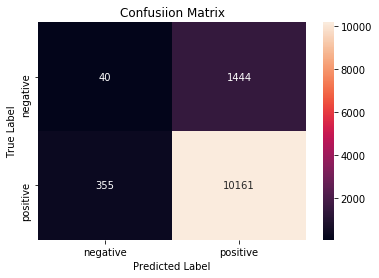

In [114]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_tfidf_dn, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [115]:
# To show main classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tfidf_dn))

             precision    recall  f1-score   support

          0       0.10      0.03      0.04      1484
          1       0.88      0.97      0.92     10516

avg / total       0.78      0.85      0.81     12000



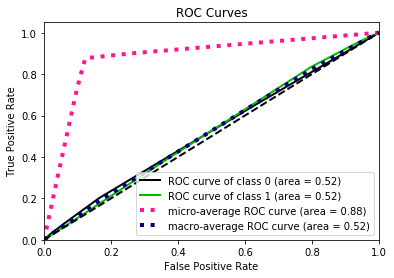

In [122]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test, pred_test_dn)

## Avg W2V

In [123]:
fileObject = open("./final_to_file2.pkl",'rb') # we open the file for reading 
final = pickle.load(fileObject) # load the object from the file

In [124]:
#w2v
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sent=[]
for sent in final['CleanedText'].values:
    list_of_sent.append(sent.split())
    
print(type(list_of_sent))
print(final['CleanedText'].values[0])
print("*****************************************************************")
print(list_of_sent[0])

<class 'list'>
witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg
*****************************************************************
['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'book', 'introduc', 'silli', 'classic', 'book', 'will', 'bet', 'son', 'still', 'abl', 'recit', 'memori', 'colleg']


In [125]:
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)

In [126]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
#print(len(sent_vectors[0]))
print(type(sent_vectors))

60000
<class 'list'>


In [127]:
# create design matrix X and target vector y
X = np.array(sent_vectors[::]) # end index is exclusive
y = np.array(final['Score']) # showing you two ways of indexing a pandas df

In [93]:
X_train_nstd = X[0:38400:1]
X_cv_nstd = X[38400:48000:1]
X_test_nstd = X[48000:60000:1]

y_train_nstd = y[0:38400:1]
y_cv_nstd = y[38400:48000:1]
y_test_nstd =y[48000:60000:1]

print(X_train_nstd.shape)
print(X_cv_nstd.shape)
print(X_test_nstd.shape)
print(y_train_nstd.shape)
print(y_cv_nstd.shape)
print(y_test_nstd.shape)

(38400, 50)
(9600, 50)
(12000, 50)
(38400,)
(9600,)
(12000,)


In [94]:
# Column Standardization of the tfidf non-standard vector
std_scal = StandardScaler(with_mean=False)
std_scal.fit(X_train_nstd)
train_avgw2v = std_scal.transform(X_train_nstd)
cv_avgw2v = std_scal.transform(X_cv_nstd)
test_avgw2v = std_scal.transform(X_test_nstd)

In [132]:
roc_score_train_avgw2v = []
roc_score_cv_avgw2v = []
length = (train_avgw2v.shape)
length[0]
length1 = (cv_avgw2v.shape)
length1[0]
cv_scores_avgw2v = []
train_scores_avgw2v = []

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn_avgw2v = KNeighborsClassifier(n_neighbors=i,algorithm='brute')

    # fitting the model on crossvalidation train
    knn_avgw2v.fit(train_avgw2v, y_train)
    
    #ROC score of Train Data
    train_prob_avgw2v = []
    for m in range(0,length[0],1000):
        train_prob_avgw2v.extend(knn_avgw2v.predict_proba(train_avgw2v[m:m+1000]))
    
    train_prob2 = np.asarray(train_prob_avgw2v)
    train_prob3 = train_prob2[:,1]
    scores_train_avgw2v = roc_auc_score(y_train,train_prob3)
    roc_score_train_avgw2v.append(scores_train_avgw2v)
    
    cv_prob_avgw2v = []
    for n in range(0,length1[0],1000):
        cv_prob_avgw2v.extend(knn_avgw2v.predict_proba(cv_avgw2v[n:n+1000]))

    cv_prob2 = np.asarray(cv_prob_avgw2v)
    cv_prob3 = cv_prob2[:,1]
    scores_cv_avgw2v = roc_auc_score(y_cv,cv_prob3)
    roc_score_cv_avgw2v.append(scores_cv_avgw2v)      
 
    print("For Hyperparameter value of K = ",i)
    print("AUC Score on Train Data: ",roc_score_train_avgw2v[-1])
    print("AUC Score on CV Data: ",roc_score_cv_avgw2v[-1])
    print("**************")

# open the file for writing an array to fileto be save on disk 
fileObject = open("./train_scores_avgw2v_to_file.pkl",'wb')
pickle.dump(roc_score_train_avgw2v,fileObject)   # this writes the object a to the file
fileObject.close() # here we close the fileObject

# open the file for writing an array to fileto be save on disk 
fileObject = open("./cv_scores_avgw2v_to_file.pkl",'wb')
pickle.dump(roc_score_cv_avgw2v,fileObject)   # this writes the object a to the file
fileObject.close() # here we close the fileObject

For Hyperparameter value of K =  1
AUC Score on Train Data:  1.0
AUC Score on CV Data:  0.6416273584905661
**************
For Hyperparameter value of K =  3
AUC Score on Train Data:  0.964066242891489
AUC Score on CV Data:  0.7308336316543127
**************
For Hyperparameter value of K =  5
AUC Score on Train Data:  0.9464236381823733
AUC Score on CV Data:  0.7643713675033692
**************
For Hyperparameter value of K =  7
AUC Score on Train Data:  0.9358948369541233
AUC Score on CV Data:  0.7849649911556604
**************
For Hyperparameter value of K =  9
AUC Score on Train Data:  0.9282529852442469
AUC Score on CV Data:  0.7991199882075471
**************
For Hyperparameter value of K =  11
AUC Score on Train Data:  0.922490903521363
AUC Score on CV Data:  0.8105407681940702
**************
For Hyperparameter value of K =  13
AUC Score on Train Data:  0.9176386638037617
AUC Score on CV Data:  0.8198501726752022
**************
For Hyperparameter value of K =  15
AUC Score on Train D

In [95]:
fileObject = open("./train_scores_avgw2v_to_file.pkl",'rb') # we open the file for reading 
train_scores_avgw2v = pickle.load(fileObject) # load the object from the file

fileObject = open("./cv_scores_avgw2v_to_file.pkl",'rb') # we open the file for reading 
cv_scores_avgw2v = pickle.load(fileObject) # load the object from the file

In [96]:
# creating odd list of K for KNN
myList = list(range(0,30))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
neighbors

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

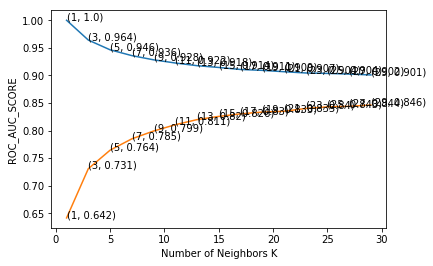

In [97]:
plt.plot(neighbors, train_scores_avgw2v)
plt.plot(neighbors, cv_scores_avgw2v)

for xy in zip(neighbors, np.round(train_scores_avgw2v,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(neighbors, np.round(cv_scores_avgw2v,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('ROC_AUC_SCORE')

plt.show()

In [98]:
#Training KNN for best hyperparameter, K=29
knn_avgw2v = KNeighborsClassifier(29,algorithm='brute')
knn_avgw2v.fit(train_avgw2v,y_train)
#pred = knn.predict(test_bow)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='uniform')

In [99]:
#finding roc_auc_score on test data
roc_score_test_avgw2v = []
length3 = (test_avgw2v.shape)
pred_test_avgw2v = []
for i in range(0,length3[0],1000):
    pred_test_avgw2v.extend(knn_avgw2v.predict_proba(test_avgw2v[i:i+1000]))

test_prob2 = np.asarray(pred_test_avgw2v)
test_prob3 = test_prob2[:,1]
scores_test_avgw2v = roc_auc_score(y_test,test_prob3)
roc_score_test_avgw2v.append(scores_test_avgw2v)

#second method
fpr, tpr, thresholds = roc_curve(y_test, test_prob3)
roc_auc_avgw2v = auc(fpr, tpr,reorder='deprecated')

In [100]:
print(roc_score_test_avgw2v)
print(roc_auc_avgw2v)

[0.8041281787013806]
0.8041281787013806


In [107]:
#defining own threshhold for prediction over probability values
def pred(y):
    y_pred = []
    for i in y:
        if i.all()>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

y_pred_avgw2v = pred(pred_test_avgw2v)

In [108]:
# Confusion Matrix on Test Data
#y_pred_avgw2v = np.argmax(pred_test_avgw2v, axis=1)
cm_avgw2v = confusion_matrix(y_test, y_pred_avgw2v)
cm_avgw2v

array([[  76, 1408],
       [3303, 7213]], dtype=int64)

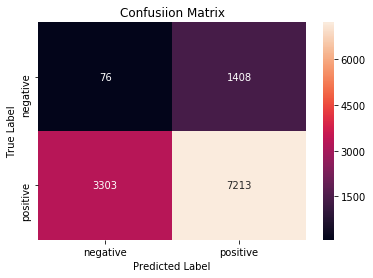

In [109]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_avgw2v, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [110]:
# To show main classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_avgw2v))

             precision    recall  f1-score   support

          0       0.02      0.05      0.03      1484
          1       0.84      0.69      0.75     10516

avg / total       0.74      0.61      0.66     12000



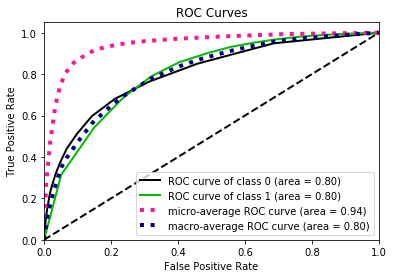

In [128]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test, pred_test_avgw2v)

## Avg W2V KD-Tree

In [129]:
svd = TruncatedSVD()
train_avgw2v_dn = svd.fit_transform(train_avgw2v)
cv_avgw2v_dn = svd.transform(cv_avgw2v)
test_avgw2v_dn = svd.transform(test_avgw2v)
#X_tr_input = X_tr_input1
#x_cv_input = x_cv_input1

In [146]:
roc_score_train_avgw2v_dn = []
roc_score_cv_avgw2v_dn = []
length = (train_avgw2v_dn.shape)

length[0]
length1 = (cv_avgw2v_dn.shape)
length1[0]
cv_scores_avgw2v_dn = []
train_scores_avgw2v_dn = []

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn_avgw2v_dn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')

    # fitting the model on crossvalidation train
    knn_avgw2v_dn.fit(train_avgw2v_dn, y_train)
    
    #ROC score of Train Data
    train_prob_avgw2v_dn = []
    for m in range(0,length[0],1000):
        train_prob_avgw2v_dn.extend(knn_avgw2v_dn.predict_proba(train_avgw2v_dn[m:m+1000]))
    
    train_prob2 = np.asarray(train_prob_avgw2v_dn)
    train_prob3 = train_prob2[:,1]
    scores_train_avgw2v_dn = roc_auc_score(y_train,train_prob3)
    roc_score_train_avgw2v_dn.append(scores_train_avgw2v_dn)
    
    cv_prob_avgw2v_dn = []
    for n in range(0,length1[0],1000):
        cv_prob_avgw2v_dn.extend(knn_avgw2v_dn.predict_proba(cv_avgw2v_dn[n:n+1000]))

    cv_prob2 = np.asarray(cv_prob_avgw2v_dn)
    cv_prob3 = cv_prob2[:,1]
    scores_cv_avgw2v_dn = roc_auc_score(y_cv,cv_prob3)
    roc_score_cv_avgw2v_dn.append(scores_cv_avgw2v_dn)      
 
    print("For Hyperparameter value of K = ",i)
    print("AUC Score on Train Data: ",roc_score_train_avgw2v_dn[-1])
    print("AUC Score on CV Data: ",roc_score_cv_avgw2v_dn[-1])
    print("**************")

# open the file for writing an array to fileto be save on disk 
fileObject = open("./train_scores_avgw2v_dn_to_file.pkl",'wb')
pickle.dump(roc_score_train_avgw2v_dn,fileObject)   # this writes the object a to the file
fileObject.close() # here we close the fileObject

# open the file for writing an array to fileto be save on disk 
fileObject = open("./cv_scores_avgw2v_dn_to_file.pkl",'wb')
pickle.dump(roc_score_cv_avgw2v_dn,fileObject)   # this writes the object a to the file
fileObject.close() # here we close the fileObject

For Hyperparameter value of K =  1
AUC Score on Train Data:  1.0
AUC Score on CV Data:  0.5102847035040431
**************
For Hyperparameter value of K =  3
AUC Score on Train Data:  0.9146414587470505
AUC Score on CV Data:  0.5275750715970351
**************
For Hyperparameter value of K =  5
AUC Score on Train Data:  0.8604265365575459
AUC Score on CV Data:  0.5506808035714287
**************
For Hyperparameter value of K =  7
AUC Score on Train Data:  0.8229644428708135
AUC Score on CV Data:  0.5545577303739893
**************
For Hyperparameter value of K =  9
AUC Score on Train Data:  0.7954907378966447
AUC Score on CV Data:  0.559232542958221
**************
For Hyperparameter value of K =  11
AUC Score on Train Data:  0.7755707409764393
AUC Score on CV Data:  0.5653790431266846
**************
For Hyperparameter value of K =  13
AUC Score on Train Data:  0.7609146922360566
AUC Score on CV Data:  0.5705514551044475
**************
For Hyperparameter value of K =  15
AUC Score on Train 

In [130]:
fileObject = open("./train_scores_avgw2v_dn_to_file.pkl",'rb') # we open the file for reading 
train_scores_avgw2v_dn = pickle.load(fileObject) # load the object from the file

fileObject = open("./cv_scores_avgw2v_dn_to_file.pkl",'rb') # we open the file for reading 
cv_scores_avgw2v_dn = pickle.load(fileObject) # load the object from the file

In [131]:
# creating odd list of K for KNN
myList = list(range(0,30))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
neighbors

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

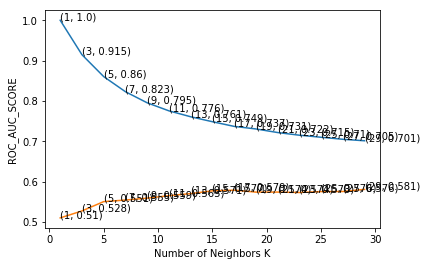

In [132]:
plt.plot(neighbors, train_scores_avgw2v_dn)
plt.plot(neighbors, cv_scores_avgw2v_dn)

for xy in zip(neighbors, np.round(train_scores_avgw2v_dn,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(neighbors, np.round(cv_scores_avgw2v_dn,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('ROC_AUC_SCORE')

plt.show()

In [133]:
#Training KNN for best hyperparameter K=29
knn_avgw2v_dn = KNeighborsClassifier(29,algorithm='kd_tree')
knn_avgw2v_dn.fit(train_avgw2v_dn,y_train)
#pred = knn.predict(test_bow)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='uniform')

In [134]:
#finding roc_auc_score on test data
roc_score_test_avgw2v_dn = []
length3 = (test_avgw2v_dn.shape)
pred_test_avgw2v_dn = []
for i in range(0,length3[0],1000):
    pred_test_avgw2v_dn.extend(knn_avgw2v_dn.predict_proba(test_avgw2v_dn[i:i+1000]))

test_prob2 = np.asarray(pred_test_avgw2v_dn)
test_prob3 = test_prob2[:,1]
scores_test_avgw2v_dn = roc_auc_score(y_test,test_prob3)
roc_score_test_avgw2v_dn.append(scores_test_avgw2v_dn)

#second method
fpr, tpr, thresholds = roc_curve(y_test, test_prob3)
roc_auc_avgw2v_dn = auc(fpr, tpr,reorder='deprecated')

In [135]:
print(roc_score_test_avgw2v_dn)
print(roc_auc_avgw2v_dn)

[0.5260885671327173]
0.5260885671327173


In [137]:
#defining own threshhold for prediction over probability values
def pred(y):
    y_pred = []
    for i in y:
        if i.all()>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

y_pred_avgw2v_dn = pred(pred_test_avgw2v_dn)

In [138]:
# Confusion Matrix on Test Data
#y_pred_avgw2v_dn = np.argmax(pred_test_avgw2v_dn, axis=1)
cm_avgw2v_dn = confusion_matrix(y_test, y_pred_avgw2v_dn)
cm_avgw2v_dn

array([[  72, 1412],
       [ 579, 9937]], dtype=int64)

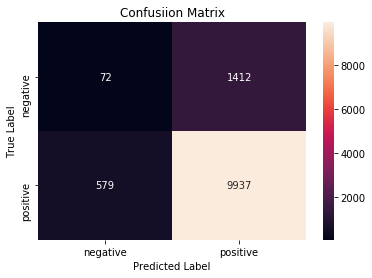

In [139]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_avgw2v_dn, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [140]:
# To show main classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_avgw2v_dn))

             precision    recall  f1-score   support

          0       0.11      0.05      0.07      1484
          1       0.88      0.94      0.91     10516

avg / total       0.78      0.83      0.80     12000



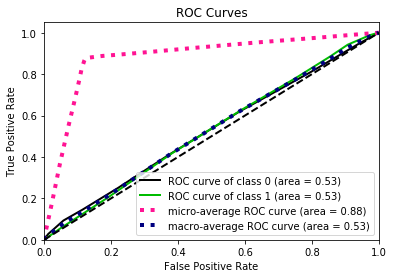

In [142]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test, pred_test_avgw2v_dn)

## tfidf-W-w2v

In [143]:
fileObject = open("./final_to_file2.pkl",'rb') # we open the file for reading 
final = pickle.load(fileObject) # load the object from the file

In [144]:
#w2v
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sent=[]
for sent in final['CleanedText'].values:
    list_of_sent.append(sent.split())
    
print(type(list_of_sent))
print(final['CleanedText'].values[0])
print("*****************************************************************")
print(list_of_sent[0])

<class 'list'>
witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg
*****************************************************************
['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'book', 'introduc', 'silli', 'classic', 'book', 'will', 'bet', 'son', 'still', 'abl', 'recit', 'memori', 'colleg']


In [145]:
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)

In [146]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(final['CleanedText'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [147]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in (list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [148]:
print(len(tfidf_sent_vectors))
print(np.shape(tfidf_sent_vectors))
print(type(tfidf_sent_vectors))

60000
(60000, 50)
<class 'list'>


In [149]:
# create design matrix X and target vector y
X = np.array(sent_vectors[::]) # end index is exclusive
y = np.array(final['Score']) # showing you two ways of indexing a pandas df

In [150]:
X_train_nstd = X[0:38400:1]
X_cv_nstd = X[38400:48000:1]
X_test_nstd = X[48000:60000:1]

y_train_nstd = y[0:38400:1]
y_cv_nstd = y[38400:48000:1]
y_test_nstd =y[48000:60000:1]

print(X_train_nstd.shape)
print(X_cv_nstd.shape)
print(X_test_nstd.shape)
print(y_train_nstd.shape)
print(y_cv_nstd.shape)
print(y_test_nstd.shape)

(38400, 50)
(9600, 50)
(12000, 50)
(38400,)
(9600,)
(12000,)


In [151]:
# Column Standardization of the tfidf non-standard vector
std_scal = StandardScaler(with_mean=False)
std_scal.fit(X_train_nstd)
train_tfidfww2v = std_scal.transform(X_train_nstd)
cv_tfidfww2v = std_scal.transform(X_cv_nstd)
test_tfidfww2v = std_scal.transform(X_test_nstd)

In [178]:
roc_score_train_tfidfww2v = []
roc_score_cv_tfidfww2v = []
length = (train_tfidfww2v.shape)
length[0]
length1 = (cv_tfidfww2v.shape)
length1[0]
cv_scores_tfidfww2v = []
train_scores_tfidfww2v = []

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn_tfidfww2v = KNeighborsClassifier(n_neighbors=i,algorithm='brute')

    # fitting the model on crossvalidation train
    knn_tfidfww2v.fit(train_tfidfww2v, y_train)
    
    #ROC score of Train Data
    train_prob_tfidfww2v = []
    for m in range(0,length[0],1000):
        train_prob_tfidfww2v.extend(knn_tfidfww2v.predict_proba(train_tfidfww2v[m:m+1000]))
    
    train_prob2 = np.asarray(train_prob_tfidfww2v)
    train_prob3 = train_prob2[:,1]
    scores_train_tfidfww2v = roc_auc_score(y_train,train_prob3)
    roc_score_train_tfidfww2v.append(scores_train_tfidfww2v)
    
    cv_prob_tfidfww2v = []
    for n in range(0,length1[0],1000):
        cv_prob_tfidfww2v.extend(knn_tfidfww2v.predict_proba(cv_tfidfww2v[n:n+1000]))

    cv_prob2 = np.asarray(cv_prob_tfidfww2v)
    cv_prob3 = cv_prob2[:,1]
    scores_cv_tfidfww2v = roc_auc_score(y_cv,cv_prob3)
    roc_score_cv_tfidfww2v.append(scores_cv_tfidfww2v)      
 
    print("For Hyperparameter value of K = ",i)
    print("AUC Score on Train Data: ",roc_score_train_tfidfww2v[-1])
    print("AUC Score on CV Data: ",roc_score_cv_tfidfww2v[-1])
    print("**************")

# open the file for writing an array to fileto be save on disk 
fileObject = open("./train_scores_tfidfww2v_to_file.pkl",'wb')
pickle.dump(roc_score_train_tfidfww2v,fileObject)   # this writes the object a to the file
fileObject.close() # here we close the fileObject

# open the file for writing an array to fileto be save on disk 
fileObject = open("./cv_scores_tfidfww2v_to_file.pkl",'wb')
pickle.dump(roc_score_cv_tfidfww2v,fileObject)   # this writes the object a to the file
fileObject.close() # here we close the fileObject

For Hyperparameter value of K =  1
AUC Score on Train Data:  1.0
AUC Score on CV Data:  0.6290918682733605
**************
For Hyperparameter value of K =  3
AUC Score on Train Data:  0.9544664526976484
AUC Score on CV Data:  0.7285839680046462
**************
For Hyperparameter value of K =  5
AUC Score on Train Data:  0.932633388113437
AUC Score on CV Data:  0.7635582887782505
**************
For Hyperparameter value of K =  7
AUC Score on Train Data:  0.9191737529619769
AUC Score on CV Data:  0.7840140109538016
**************
For Hyperparameter value of K =  9
AUC Score on Train Data:  0.9089419422235436
AUC Score on CV Data:  0.7943477067739765
**************
For Hyperparameter value of K =  11
AUC Score on Train Data:  0.902651538737849
AUC Score on CV Data:  0.8009534759351459
**************
For Hyperparameter value of K =  13
AUC Score on Train Data:  0.8965433801997478
AUC Score on CV Data:  0.8054173225563753
**************
For Hyperparameter value of K =  15
AUC Score on Train D

In [152]:
fileObject = open("./train_scores_tfidfww2v_to_file.pkl",'rb') # we open the file for reading 
train_scores_tfidfww2v = pickle.load(fileObject) # load the object from the file

fileObject = open("./cv_scores_tfidfww2v_to_file.pkl",'rb') # we open the file for reading 
cv_scores_tfidfww2v = pickle.load(fileObject) # load the object from the file

In [153]:
# creating odd list of K for KNN
myList = list(range(0,30))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
neighbors

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

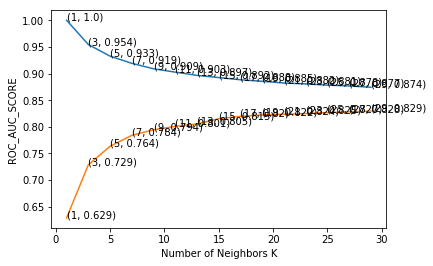

In [154]:
plt.plot(neighbors, train_scores_tfidfww2v)
plt.plot(neighbors, cv_scores_tfidfww2v)

for xy in zip(neighbors, np.round(train_scores_tfidfww2v,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(neighbors, np.round(cv_scores_tfidfww2v,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('ROC_AUC_SCORE')

plt.show()

In [155]:
#Training KNN for best hyperparameter, K=29
knn_tfidfww2v = KNeighborsClassifier(29,algorithm='brute')
knn_tfidfww2v.fit(train_tfidfww2v,y_train)
#pred = knn.predict(test_bow)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='uniform')

In [170]:
#finding roc_auc_score on test data
roc_score_test_tfidfww2v = []
length3 = (test_tfidfww2v.shape)
pred_test_tfidfww2v = []
for i in range(0,length3[0],1000):
    pred_test_tfidfww2v.extend(knn_tfidfww2v.predict_proba(test_tfidfww2v[i:i+1000]))

test_prob2 = np.asarray(pred_test_tfidfww2v)
test_prob3 = test_prob2[:,1]
scores_test_tfidfww2v = roc_auc_score(y_test,test_prob3)
roc_score_test_tfidfww2v.append(scores_test_tfidfww2v)

#second method
fpr, tpr, thresholds = roc_curve(y_test, test_prob3)
roc_auc_tfidfww2v = auc(fpr, tpr,reorder='deprecated')

In [171]:
print(roc_score_test_tfidfww2v)
print(roc_auc_tfidfww2v)

[0.8013060447486515]
0.8013060447486515


In [172]:
#defining own threshhold for prediction over probability values
def pred(y):
    y_pred = []
    for i in y:
        if i.all()>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

y_pred_tfidfww2v  = pred(pred_test_tfidfww2v)

In [160]:
# Confusion Matrix on Test Data
#y_pred_tfidfww2v = np.argmax(pred_test_tfidfww2v, axis=1)
cm_tfidfww2v = confusion_matrix(y_test, pred_test_tfidfww2v)
cm_tfidfww2v

array([[ 101, 1383],
       [3425, 7091]], dtype=int64)

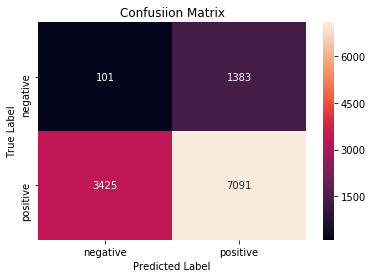

In [161]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_tfidfww2v, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [173]:
# To show main classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tfidfww2v))

             precision    recall  f1-score   support

          0       0.03      0.07      0.04      1484
          1       0.84      0.67      0.75     10516

avg / total       0.74      0.60      0.66     12000



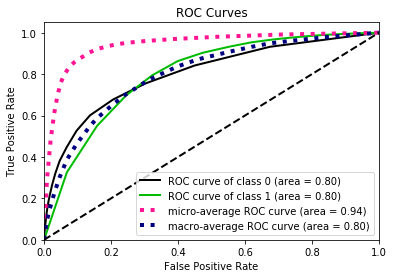

In [174]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test, pred_test_tfidfww2v)

## tfidf-W-w2v KD-Tree

In [175]:
svd = TruncatedSVD()
train_tfidfww2v_dn = svd.fit_transform(train_tfidfww2v)
cv_tfidfww2v_dn = svd.transform(cv_tfidfww2v)
test_tfidfww2v_dn = svd.transform(test_tfidfww2v)
#X_tr_input = X_tr_input1
#x_cv_input = x_cv_input1

In [190]:
roc_score_train_tfidfww2v_dn = []
roc_score_cv_tfidfww2v_dn = []
length = (train_tfidfww2v_dn.shape)

length[0]
length1 = (cv_tfidfww2v_dn.shape)
length1[0]
cv_scores_tfidfww2v_dn = []
train_scores_tfidfww2v_dn = []

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn_tfidfww2v_dn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')

    # fitting the model on crossvalidation train
    knn_tfidfww2v_dn.fit(train_tfidfww2v_dn, y_train)
    
    #ROC score of Train Data
    train_prob_tfidfww2v_dn = []
    for m in range(0,length[0],1000):
        train_prob_tfidfww2v_dn.extend(knn_tfidfww2v_dn.predict_proba(train_tfidfww2v_dn[m:m+1000]))
    
    train_prob2 = np.asarray(train_prob_tfidfww2v_dn)
    train_prob3 = train_prob2[:,1]
    scores_train_tfidfww2v_dn = roc_auc_score(y_train,train_prob3)
    roc_score_train_tfidfww2v_dn.append(scores_train_tfidfww2v_dn)
    
    cv_prob_tfidfww2v_dn = []
    for n in range(0,length1[0],1000):
        cv_prob_tfidfww2v_dn.extend(knn_tfidfww2v_dn.predict_proba(cv_tfidfww2v_dn[n:n+1000]))

    cv_prob2 = np.asarray(cv_prob_tfidfww2v_dn)
    cv_prob3 = cv_prob2[:,1]
    scores_cv_tfidfww2v_dn = roc_auc_score(y_cv,cv_prob3)
    roc_score_cv_tfidfww2v_dn.append(scores_cv_tfidfww2v_dn)      
 
    print("For Hyperparameter value of K = ",i)
    print("AUC Score on Train Data: ",roc_score_train_tfidfww2v_dn[-1])
    print("AUC Score on CV Data: ",roc_score_cv_tfidfww2v_dn[-1])
    print("**************")

# open the file for writing an array to fileto be save on disk 
fileObject = open("./train_scores_tfidfww2v_dn_to_file.pkl",'wb')
pickle.dump(roc_score_train_tfidfww2v_dn,fileObject)   # this writes the object a to the file
fileObject.close() # here we close the fileObject

# open the file for writing an array to fileto be save on disk 
fileObject = open("./cv_scores_tfidfww2v_dn_to_file.pkl",'wb')
pickle.dump(roc_score_cv_tfidfww2v_dn,fileObject)   # this writes the object a to the file
fileObject.close() # here we close the fileObject

For Hyperparameter value of K =  1
AUC Score on Train Data:  1.0
AUC Score on CV Data:  0.5007905803947984
**************
For Hyperparameter value of K =  3
AUC Score on Train Data:  0.9150161587849105
AUC Score on CV Data:  0.5049755896194782
**************
For Hyperparameter value of K =  5
AUC Score on Train Data:  0.860443396085576
AUC Score on CV Data:  0.5137076868641666
**************
For Hyperparameter value of K =  7
AUC Score on Train Data:  0.821447728032627
AUC Score on CV Data:  0.5103000054074975
**************
For Hyperparameter value of K =  9
AUC Score on Train Data:  0.7919104441432063
AUC Score on CV Data:  0.5177977455419015
**************
For Hyperparameter value of K =  11
AUC Score on Train Data:  0.7707894102460164
AUC Score on CV Data:  0.5201542648336811
**************
For Hyperparameter value of K =  13
AUC Score on Train Data:  0.7543325817165799
AUC Score on CV Data:  0.5291516807311277
**************
For Hyperparameter value of K =  15
AUC Score on Train D

In [176]:
fileObject = open("./train_scores_tfidfww2v_dn_to_file.pkl",'rb') # we open the file for reading 
train_scores_tfidfww2v_dn = pickle.load(fileObject) # load the object from the file

fileObject = open("./cv_scores_tfidfww2v_dn_to_file.pkl",'rb') # we open the file for reading 
cv_scores_tfidfww2v_dn = pickle.load(fileObject) # load the object from the file

In [177]:
# creating odd list of K for KNN
myList = list(range(0,30))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
neighbors

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

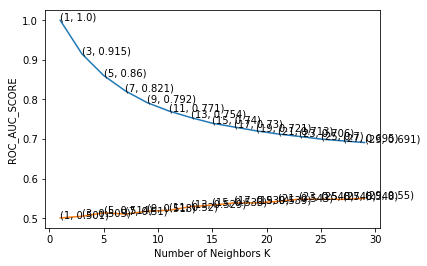

In [178]:
plt.plot(neighbors, train_scores_tfidfww2v_dn)
plt.plot(neighbors, cv_scores_tfidfww2v_dn)

for xy in zip(neighbors, np.round(train_scores_tfidfww2v_dn,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
for xy in zip(neighbors, np.round(cv_scores_tfidfww2v_dn,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('ROC_AUC_SCORE')

plt.show()

In [179]:
#Training KNN for best hyperparameter K=29
knn_tfidfww2v_dn = KNeighborsClassifier(29,algorithm='kd_tree')
knn_tfidfww2v_dn.fit(train_tfidfww2v_dn,y_train)
#pred = knn.predict(test_bow)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='uniform')

In [180]:
#finding roc_auc_score on test data
roc_score_test_tfidfww2v_dn = []
length3 = (test_tfidfww2v_dn.shape)
pred_test_tfidfww2v_dn = []
for i in range(0,length3[0],1000):
    pred_test_tfidfww2v_dn.extend(knn_tfidfww2v_dn.predict_proba(test_tfidfww2v_dn[i:i+1000]))

test_prob2 = np.asarray(pred_test_tfidfww2v_dn)
test_prob3 = test_prob2[:,1]
scores_test_tfidfww2v_dn = roc_auc_score(y_test,test_prob3)
roc_score_test_tfidfww2v_dn.append(scores_test_tfidfww2v_dn)

#second method
fpr, tpr, thresholds = roc_curve(y_test, test_prob3)
roc_auc_tfidfww2v_dn = auc(fpr, tpr,reorder='deprecated')

In [181]:
print(roc_score_test_tfidfww2v_dn)
print(roc_auc_tfidfww2v_dn)

[0.5401176323281991]
0.5401176323281991


In [187]:
#defining own threshhold for prediction over probability values
def pred(y):
    y_pred = []
    for i in y:
        if i.all()>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

y_pred_tfidfww2v_dn = pred(pred_test_tfidfww2v_dn)

In [188]:
# Confusion Matrix on Test Data
#y_pred_tfidfww2v_dn = np.argmax(pred_test_tfidfww2v_dn, axis=1)
cm_tfidfww2v_dn = confusion_matrix(y_test, y_pred_tfidfww2v_dn)
cm_tfidfww2v_dn

array([[  74, 1410],
       [ 603, 9913]], dtype=int64)

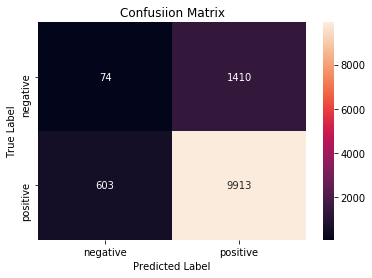

In [189]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_tfidfww2v_dn, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [192]:
# To show main classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tfidfww2v_dn))

             precision    recall  f1-score   support

          0       0.11      0.05      0.07      1484
          1       0.88      0.94      0.91     10516

avg / total       0.78      0.83      0.80     12000



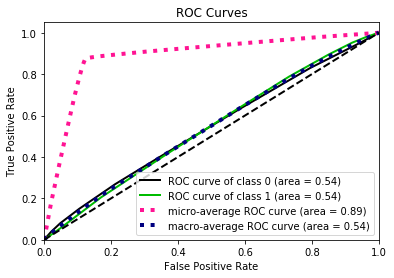

In [193]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test, pred_test_tfidfww2v_dn)

In [197]:
x = PrettyTable()
x.field_names = ["Paramters/Models","BoW", "TF-IDF", "Avg w2v", "TFIDF-Avg-ww2v"]

x.add_row(["Best Hyperparameter (Brute Force)", "29","19","29","29"])
x.add_row(["Best Hyperparameter (KD-Tree)","19" ,"25","29","29"])

x.add_row(["ROC_AUC_Score (Brute Force)", roc_score_test,roc_score_test_tfidf,roc_score_test_avgw2v,roc_score_test_tfidfww2v])
x.add_row(["ROC_AUC_Score (KD-Tree)", roc_score_test_dn,roc_score_test_tfidf_dn,roc_score_test_avgw2v_dn,roc_score_test_tfidfww2v_dn])

print(x)

+-----------------------------------+----------------------+----------------------+----------------------+----------------------+
|          Paramters/Models         |         BoW          |        TF-IDF        |       Avg w2v        |    TFIDF-Avg-ww2v    |
+-----------------------------------+----------------------+----------------------+----------------------+----------------------+
| Best Hyperparameter (Brute Force) |          29          |          19          |          29          |          29          |
|   Best Hyperparameter (KD-Tree)   |          19          |          25          |          29          |          29          |
|    ROC_AUC_Score (Brute Force)    | [0.7076795890026133] | [0.6179884791138444] | [0.8041281787013806] | [0.8013060447486515] |
|      ROC_AUC_Score (KD-Tree)      | [0.5208303750208897] | [0.5197627232639468] | [0.5260885671327173] | [0.5401176323281991] |
+-----------------------------------+----------------------+----------------------+-------